In [58]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [59]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv


In [60]:
dateParser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

clima = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv', 
                    parse_dates=['dt'],
                    date_parser=dateParser,
                    low_memory=False
                   )

<ipython-input-60-2e52c6e19752>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateParser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')


In [61]:
clima.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [62]:
clima.columns = ['fecha', 'temp', 'incertidumbre', 'pais']

In [63]:
clima.fecha.describe()

<ipython-input-63-3a129c708011>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clima.fecha.describe()


count                  577462
unique                   3239
top       2013-09-01 00:00:00
freq                      243
first     1743-11-01 00:00:00
last      2013-09-01 00:00:00
Name: fecha, dtype: object

In [64]:
mexico = pd.DataFrame(clima[clima.pais == 'Mexico'])
mexico.head()

,fecha,temp,incertidumbre,pais
338438,1835-01-01,15.810,1.484,Mexico
338439,1835-02-01,14.911,1.579,Mexico
338440,1835-03-01,16.826,1.858,Mexico
338441,1835-04-01,19.925,1.966,Mexico
338442,1835-05-01,22.037,1.609,Mexico


In [65]:
mexico['year'] = pd.DatetimeIndex(mexico['fecha']).year
mexico['mes'] = pd.DatetimeIndex(mexico['fecha']).month

In [66]:
mexico['decada'] = (pd.DatetimeIndex(mexico.fecha).year-1)/10
mexico.decada = mexico.decada.apply(lambda x: math.floor(x))*10

In [67]:
mexico.head()

,fecha,temp,incertidumbre,pais,year,mes,decada
338438,1835-01-01,15.810,1.484,Mexico,1835,1,1830
338439,1835-02-01,14.911,1.579,Mexico,1835,2,1830
338440,1835-03-01,16.826,1.858,Mexico,1835,3,1830
338441,1835-04-01,19.925,1.966,Mexico,1835,4,1830
338442,1835-05-01,22.037,1.609,Mexico,1835,5,1830


In [68]:
plt.style.use('fivethirtyeight')

In [79]:
def temppormes(rango):
    plt.figure(figsize=(15, 8))
    for year in rango:
        ini = datetime.datetime.strptime('{}-01-01'.format(year), '%Y-%m-%d')
        fin = datetime.datetime.strptime('{}-12-31'.format(year), '%Y-%m-%d')

        rango = mexico[(mexico.fecha >= ini) & (mexico.fecha <= fin)]

        plt.plot(rango.mes, rango.temp, label=year)

    plt.title('Comparativa de temperaturas')
    plt.xlabel('Fecha')
    plt.ylabel('Temp °C')
print()

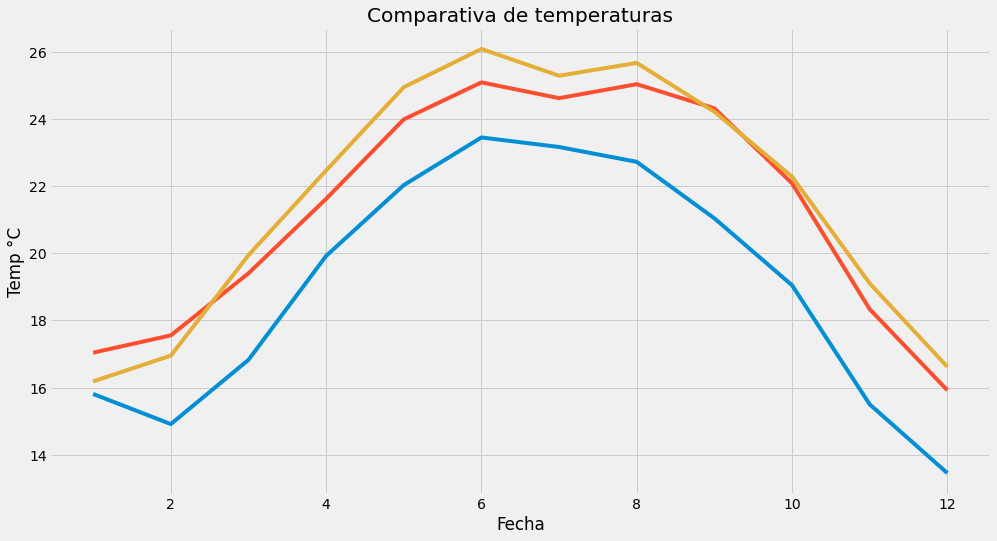

In [83]:
years = [1835, 1950, 2012]
temppormes(years)

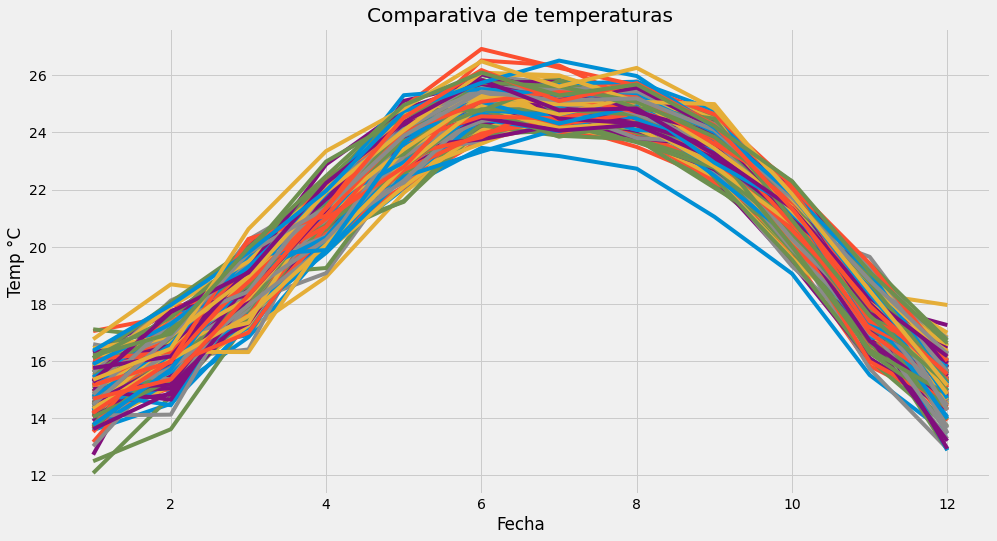

In [81]:
temppormes(range(np.min(mexico.year), np.max(mexico.year)))

In [71]:
meant = mexico.groupby(['year'])['temp'].mean()

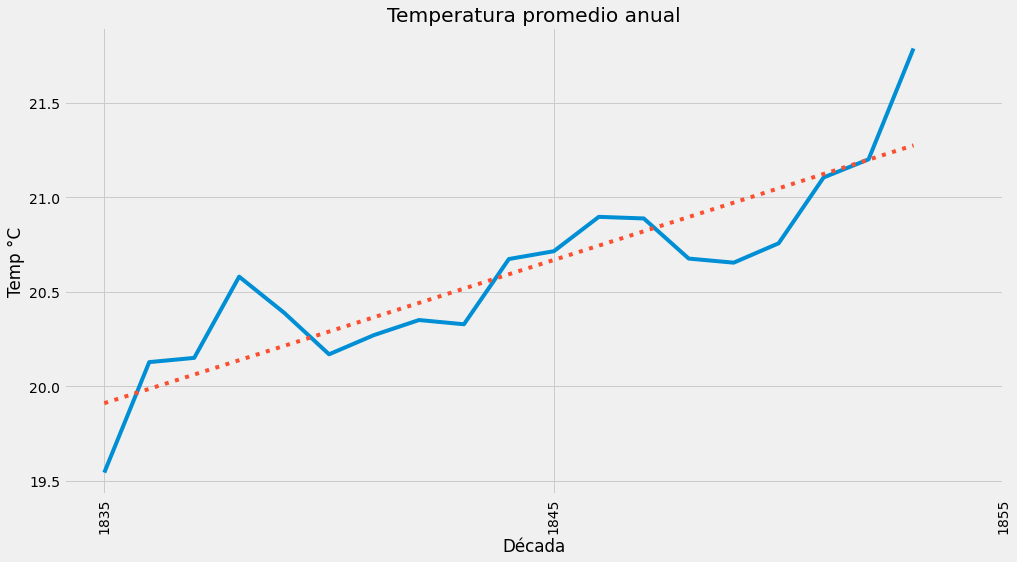

In [78]:
plt.figure(figsize=(15, 8))
plt.title('Temperatura promedio anual')

x = np.arange(0, len(meant))
xrange = np.arange(0, len(meant)+10, 10)

coef = np.polyfit(x, meant, 1)
poly1d_fn = np.poly1d(coef)

plt.plot(x, meant)
plt.plot(x, poly1d_fn(x), ls=":")

plt.xticks(xrange, np.arange(1835, 2020, 10), rotation=90)
plt.xlabel('Década')
plt.ylabel('Temp °C')
print()

In [73]:
meant = mexico.groupby(['decada'])['temp'].mean()

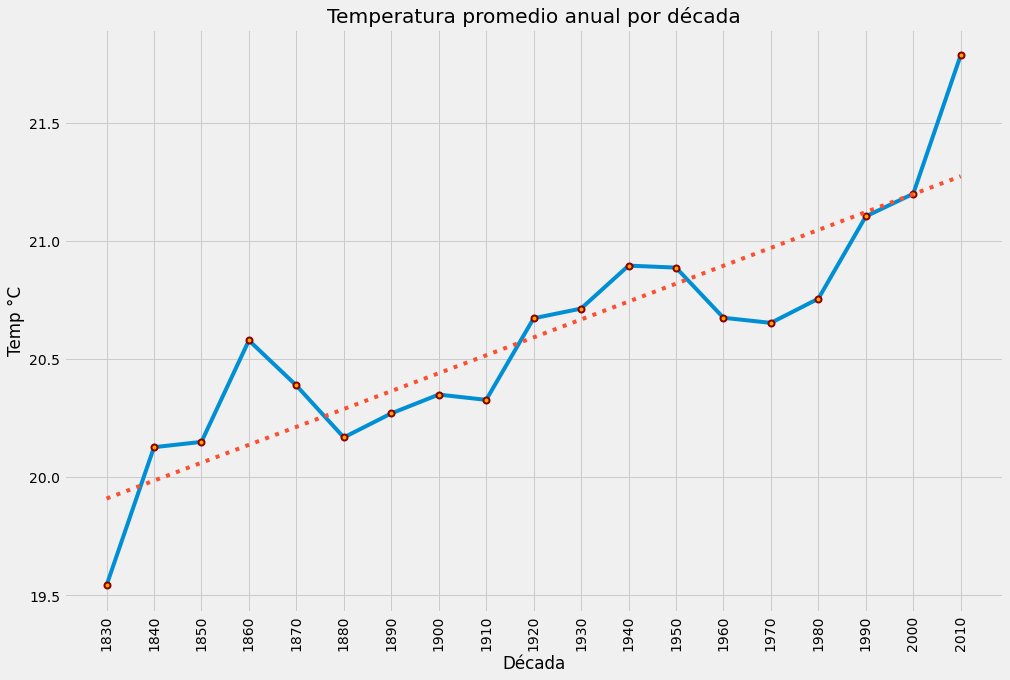

In [77]:
plt.figure(figsize=(15, 10))
plt.title('Temperatura promedio anual por década')
x = np.array(range(1, int(np.floor((2010-1820)/10)+1)))

coef = np.polyfit(x, meant, 1)
poly1d_fn = np.poly1d(coef)

plt.plot(x, meant, marker='o', mec='darkred', mfc='orange', mew=2)
plt.plot(x, poly1d_fn(x), ls=":")

plt.xticks(x, np.arange(1830, 2020, 10), rotation=90)
plt.xlabel('Década')
plt.ylabel('Temp °C')
print()

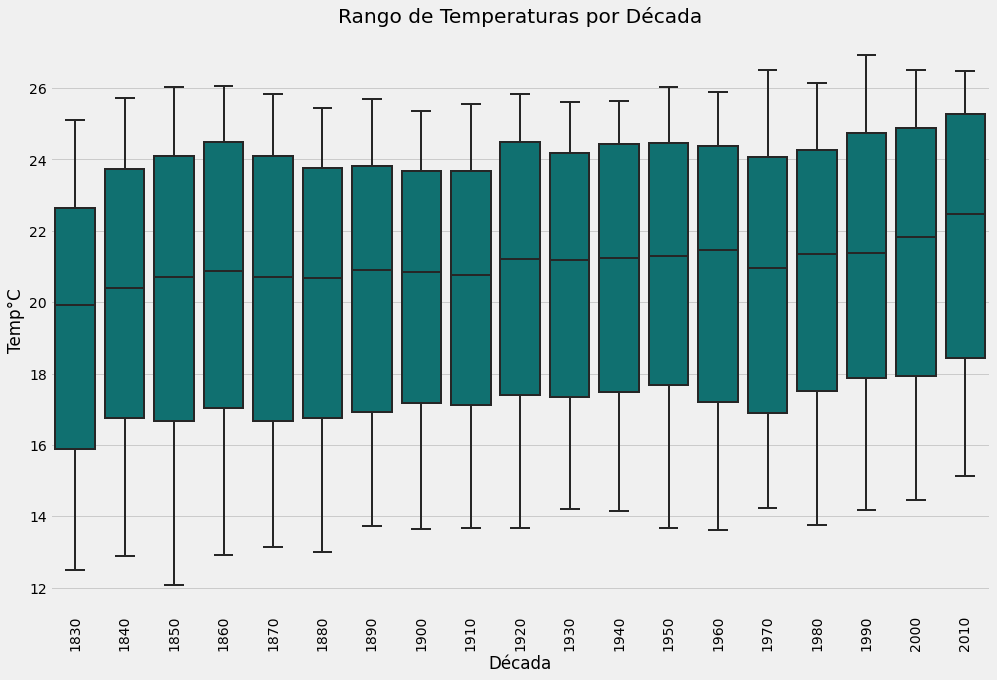

In [76]:
plt.figure(figsize=(15, 10))
g = sns.boxplot(x='decada', y='temp', data=mexico, color="teal", linewidth=2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

g.set_xlabel("Década")
g.set_ylabel("Temp°C")
g.set_title('Rango de Temperaturas por Década')
print()